<a href="https://colab.research.google.com/github/DSGP-Group-1-EAPS/SL-Apparel-Dataset/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting using Logistic Regression**

# Connecting Dataset

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from google.colab import drive

# Mounting the Google Drive
drive.mount('/content/drive')

# Reading the data from the excel file and removing blank spaces in each cell
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/preprocessed_data_new.xlsx')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Plotting feature importance

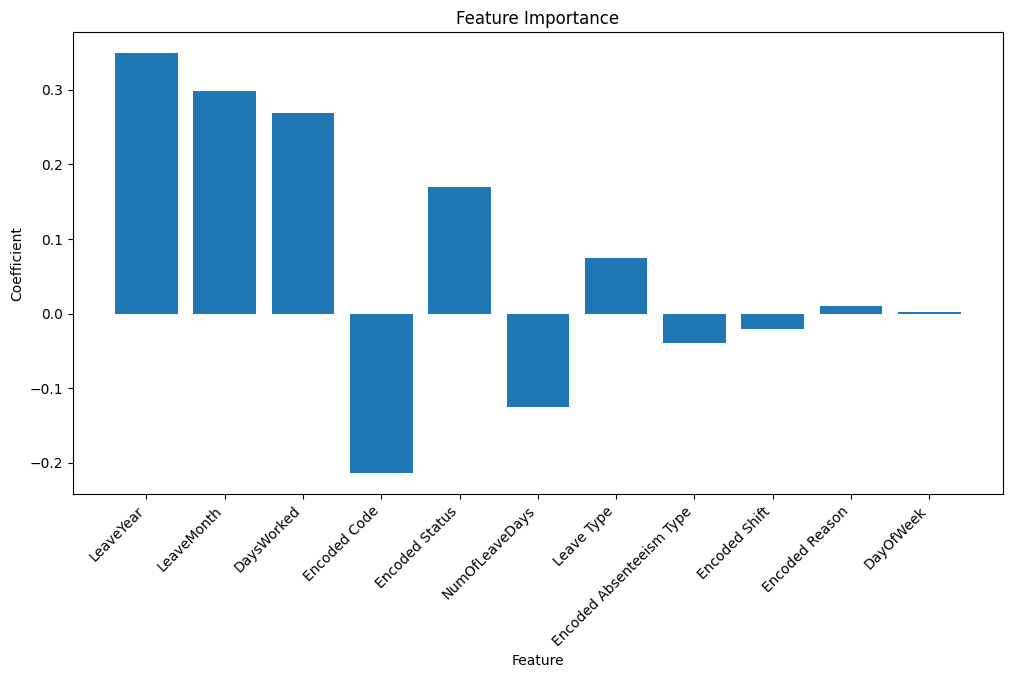

In [51]:
import matplotlib.pyplot as plt

# Get feature names and corresponding coefficients
feature_names = X_train_numeric.columns
coefficients = model.coef_[0]

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Remove 'TookLeaveNextMonth' from the DataFrame
feature_importance_df = feature_importance_df[feature_importance_df['Feature'] != 'TookLeaveNextMonth']

# Sort the DataFrame by coefficient magnitude
feature_importance_df = feature_importance_df.reindex(feature_importance_df['Coefficient'].abs().sort_values(ascending=False).index)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Coefficient'])
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.xticks(rotation=45, ha="right")
plt.show()


# Extracting and scaling data (Randomly)

In [52]:
# Extract features and target variable
X = data.drop('LeavesNextMonth', axis=1)  # All columns except 'LeavesNextMonth'
y = data['LeavesNextMonth']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Drop non-numeric columns before scaling
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Create and train the logistic regression model with increased iterations

In [53]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
probabilities = model.predict_proba(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)


# Display results
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")



Model Evaluation:
Accuracy: 0.6477


# Extracting and scaling data (Manually )

In [57]:
# Convert 'LeaveYear' and 'LeaveMonth' to datetime
data['LeaveDate'] = pd.to_datetime(data['LeaveYear'].astype(str) + '-' + data['LeaveMonth'].astype(str) + '-01')
data = data.sort_values('LeaveDate')  # Sort by date

# Choose a date to split the data into training and testing sets
split_date = pd.to_datetime('2023-06-01')

# Split the data based on the chosen date
train_data = data[data['LeaveDate'] < split_date]
test_data = data[data['LeaveDate'] >= split_date]

# Extract features and target variable for training set
X_train = train_data.drop(['LeavesNextMonth', 'TookLeaveNextMonth', 'LeaveDate'], axis=1)
y_train = train_data['LeavesNextMonth']

# Extract features and target variable for testing set
X_test = test_data.drop(['LeavesNextMonth', 'TookLeaveNextMonth', 'LeaveDate'], axis=1)
y_test = test_data['LeavesNextMonth']

# Drop non-numeric columns before scaling
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)



# Create and train the logistic regression model with increased iterations

In [58]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
probabilities = model.predict_proba(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)


# Display results
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")



Model Evaluation:
Accuracy: 0.6605
